# Explore here

In [1]:
import pandas as pd

data_raw = pd.read_csv('/workspaces/proyecto_DataScience_DMS/data/raw/base-2022-comunas.csv', index_col=0, sep=',', encoding='latin-1')

data_raw.head()

,EDAD,PAIS,AÑO ESTIMACION,REGION,COMUNA,CENSO AJUSTADO,RRAA_REGULAR,RRAA_IRREGULAR,RRAA_TOTAL,ESTIMACION
SEXO,,,,,,,,,,
H,00 A 04,ALEMANIA,2018,NaN,OTRAS COMUNAS,9.0,1.0,NaN,1.0,10
H,00 A 04,ALEMANIA,2018,COQUIMBO,LA SERENA,2.0,NaN,NaN,NaN,2
H,00 A 04,ALEMANIA,2018,MAULE,CURICÓ,1.0,NaN,NaN,NaN,1
H,00 A 04,ALEMANIA,2018,METROPOLITANA DE SANTIAGO,ESTACIÓN CENTRAL,1.0,NaN,NaN,NaN,1
H,00 A 04,ALEMANIA,2018,METROPOLITANA DE SANTIAGO,LAS CONDES,3.0,NaN,NaN,NaN,3


In [2]:
data_raw.columns

Index(['EDAD', 'PAIS', 'AÑO ESTIMACION', 'REGION', 'COMUNA', 'CENSO AJUSTADO',
       'RRAA_REGULAR', 'RRAA_IRREGULAR', 'RRAA_TOTAL', 'ESTIMACION'],
      dtype='object')

In [ ]:
data_raw.describe()

,AÑO ESTIMACION,CENSO AJUSTADO,RRAA_REGULAR,RRAA_IRREGULAR,RRAA_TOTAL,ESTIMACION
count,123986.000000,113813.000000,74611.000000,20375.000000,76931.000000,123986.000000
mean,2020.012469,34.374544,44.765504,10.488098,46.193264,60.216186
std,1.411875,144.748952,270.242135,132.159791,279.740904,321.739695
min,2018.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2019.000000,2.000000,1.000000,1.000000,1.000000,2.000000
50%,2020.000000,5.000000,4.000000,1.000000,4.000000,7.000000
75%,2021.000000,19.000000,17.000000,3.000000,17.000000,28.000000
max,2022.000000,6289.000000,10904.000000,8381.000000,10912.000000,14712.000000


In [4]:
data_raw.drop(['RRAA_REGULAR','RRAA_IRREGULAR','RRAA_TOTAL','CENSO AJUSTADO'],axis=1, inplace = True)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123986 entries, H to M
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EDAD            123986 non-null  object
 1   PAIS            123986 non-null  object
 2   AÑO ESTIMACION  123986 non-null  int64 
 3   REGION          120391 non-null  object
 4   COMUNA          123986 non-null  object
 5   ESTIMACION      123986 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 6.6+ MB


In [5]:
data_raw.reset_index(inplace=True)
data_raw['EDAD']

0          00 A 04
1          00 A 04
2          00 A 04
3          00 A 04
4          00 A 04
            ...   
123981    IGNORADA
123982    IGNORADA
123983    IGNORADA
123984    IGNORADA
123985    IGNORADA
Name: EDAD, Length: 123986, dtype: object

In [6]:
df_rango_edades = data_raw['EDAD'].nunique()

print(df_rango_edades)

edades = ', '.join(data_raw['EDAD'].unique())
print(edades)

18
00 A 04, 05 A 09, 10 A 14, 15 A 19, 20 A 24, 25 A 29, 30 A 34, 35 A 39, 40 A 44, 45 A 49, 50 A 54, 55 A 59, 60 A 64, 65 A 69, 70 A 74, 75 A 79, 80 O MÁS, IGNORADA


In [7]:
#sirve para evaluar las columnas a eliminar e identificar aquellas que debemos filtrar

def contar_NAN(ds):
    conteo = ds.isna().sum()
    return conteo
    

contiene_nan = data_raw.isna().any()

data_raw_NaN = pd.concat([contiene_nan,contar_NAN(data_raw)], axis=1)
data_raw_NaN.columns = ['Contiene NaN','Cantidad']
data_raw_NaN

,Contiene NaN,Cantidad
SEXO,False,0
EDAD,False,0
PAIS,False,0
AÑO ESTIMACION,False,0
REGION,True,3595
COMUNA,False,0
ESTIMACION,False,0


In [ ]:
rango_edades = ['20 A 24', '25 A 29', '30 A 34', '35 A 39', '40 A 44', '45 A 49', '50 A 54', '55 A 59', '60 A 64', '65 A 69', '70 A 74', '75 A 79', '80 O MÁS']
df_filtro_edades  = data_raw[data_raw['EDAD'].isin(rango_edades)]

df_filtro_edades

,SEXO,EDAD,PAIS,AÑO ESTIMACION,REGION,COMUNA,ESTIMACION
13885,H,20 A 24,ALEMANIA,2018,NaN,OTRAS COMUNAS,40
13886,H,20 A 24,ALEMANIA,2018,ANTOFAGASTA,ANTOFAGASTA,1
13887,H,20 A 24,ALEMANIA,2018,BIOBÍO,CONCEPCIÓN,3
13888,H,20 A 24,ALEMANIA,2018,COQUIMBO,COQUIMBO,1
13889,H,20 A 24,ALEMANIA,2018,COQUIMBO,LA SERENA,4
...,...,...,...,...,...,...,...
123827,M,80 O MÁS,VENEZUELA,2022,METROPOLITANA DE SANTIAGO,ÑUÑOA,51
123828,M,80 O MÁS,VENEZUELA,2022,REGIÓN IGNORADA,IGNORADA,146
123829,M,80 O MÁS,VENEZUELA,2022,TARAPACÁ,IQUIQUE,5
123830,M,80 O MÁS,VENEZUELA,2022,VALPARAÍSO,VALPARAÍSO,6


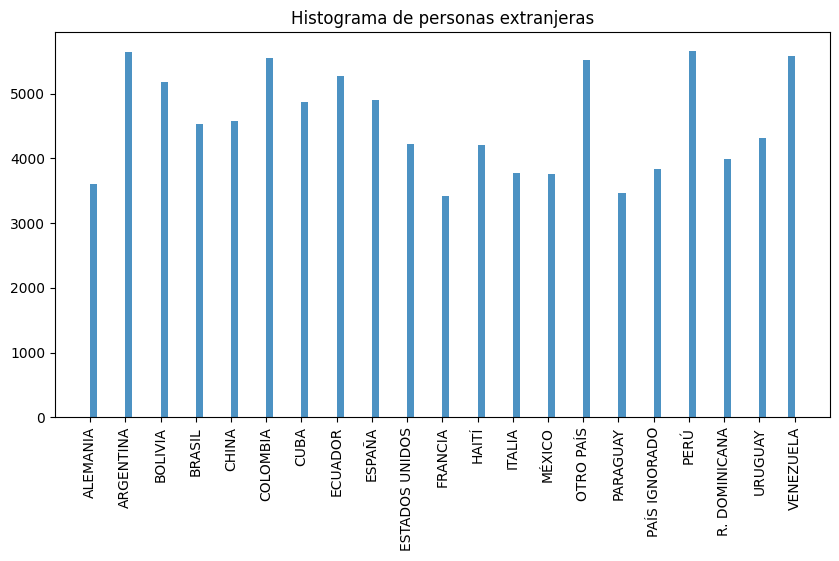

In [17]:
import matplotlib.pyplot as plt
data = df_filtro_edades['PAIS']
plt.figure(figsize = (10, 5))
plt.hist(x=data, bins = 100, alpha = 0.8)
plt.title("Histograma de personas extranjeras")
plt.xticks(rotation=90)
plt.show()
